In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
#import ggplot as gg
from ggplot import *
import bokeh as bkh

In [4]:
from IPython.core.display import HTML
css = open('other/style-table.css').read() + open('other/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Assignment

How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.
2. Get going by asking the following questions and looking for the answers with some code and plots:
  1. Can you count something interesting?
  2. Can you find some trends (high, low, increase, decrease, anomalies)?
  3. Can you make a bar plot or a histogram?
  4. Can you compare two related quantities?
  5. Can you make a scatterplot?
  6. Can you make a time-series plot?
3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
4. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:
1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions.

In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook

In [5]:
# Load New York City salaries dataset from OpenData
nyc = pd.read_csv('data/nyc/Citywide_Payroll_Data__Fiscal_Year_.csv', dtype={7: object})

# Staring with New York City salaries dataset

In [6]:
# Removing columns I do not intend to use
nyc = nyc.drop(nyc.columns[[1,7,10]], axis=1)

In [7]:
nyc.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Title Description,Leave Status as of July 31,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2014,OFFICE OF THE MAYOR,MULLEN,ALFRED,J,03/20/1972,CALENDAR ASSISTANT ...,ON SEPARATION LEAVE,per Annum,1825.0,$83096.78,0.0,$228.03,$0.00
1,2014,OFFICE OF THE MAYOR,GARRETT,CORNELIUS,S,09/25/1976,FISCAL RESPONSIBILITY OFFICER ...,ON SEPARATION LEAVE,per Annum,1825.0,$70790.46,10.5,$845.07,$0.00
2,2014,OFFICE OF THE MAYOR,LEONARD,DIANE,M,11/22/1977,EXECUTIVE ASSISTANT-MIDTOWN ENFORCEMENT ...,ACTIVE,per Hour,1573.0,$63165.38,0.0,$0.00,$0.00
3,2014,OFFICE OF THE MAYOR,ROSS,JEAN,A,07/01/1978,ADMINISTRATIVE MANAGER ...,ACTIVE,per Annum,1825.0,$125370.69,0.0,$0.00,$0.00
4,2014,OFFICE OF THE MAYOR,WEINSTOCK,SUSAN,NaN,07/01/1978,ADMINISTRATIVE PRINTING SERVICES MANAGER ...,ACTIVE,per Annum,1825.0,$84268.60,0.0,$0.00,$0.00


In [8]:
# Removing spaces in column names.
nyc.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [9]:
# Removing the $ (the dollar sign) to convert to numeric
nyc['Regular_Gross_Paid'] = nyc['Regular_Gross_Paid'].str.lstrip('$')
nyc['Total_OT_Paid'] = nyc['Total_OT_Paid'].str.lstrip('$')
nyc['Total_Other_Pay'] = nyc['Total_Other_Pay'].str.lstrip('$')

In [10]:
# Converting to_numeric() for quantatative anlysis
nyc['Regular_Gross_Paid'] = pd.to_numeric(nyc['Regular_Gross_Paid'])
nyc['Total_OT_Paid'] = pd.to_numeric(nyc['Total_OT_Paid'])
nyc['Total_Other_Pay'] = pd.to_numeric(nyc['Total_Other_Pay'])

In [212]:
# Confirming converstion worked
nyc.dtypes

Fiscal_Year                     int64
Agency_Name                    object
Last_Name                      object
First_Name                     object
Mid_Init                       object
Agency_Start_Date              object
Title_Description              object
Leave_Status_as_of_July_31     object
Pay_Basis                      object
Regular_Hours                 float64
Regular_Gross_Paid            float64
OT_Hours                      float64
Total_OT_Paid                 float64
Total_Other_Pay               float64
dtype: object

In [213]:
# Lets look at the total amount of rows in NYC salaries dataset
len(nyc)

1691487

In [217]:
# Creating the TotalPay column which combines all pay fields.
nyc['TotalPay'] = nyc.Regular_Gross_Paid + nyc.Total_OT_Paid + nyc.Total_Other_Pay

In [218]:
# This honestly doesnt tell me anything.
nyc.describe()

,Fiscal_Year,Regular_Hours,Regular_Gross_Paid,OT_Hours,Total_OT_Paid,Total_Other_Pay,TotalPay
count,1.691487e+06,1.691486e+06,1.691486e+06,1.691486e+06,1.691486e+06,1.691486e+06,1.691486e+06
mean,2.015021e+03,7.022911e+02,3.996266e+04,6.443838e+01,3.440764e+03,2.302203e+03,4.570563e+04
std,7.892326e-01,9.041001e+02,3.665592e+04,1.519441e+02,8.886150e+03,5.083747e+03,4.379493e+04
min,2.014000e+03,-7.304300e+02,-2.986219e+04,-8.000000e+00,-2.382685e+04,-2.815950e+05,-1.740880e+05
25%,2.014000e+03,0.000000e+00,3.651787e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.710333e+03
50%,2.015000e+03,0.000000e+00,3.518840e+04,0.000000e+00,0.000000e+00,8.200000e-01,3.738725e+04
75%,2.016000e+03,1.825000e+03,7.172129e+04,8.000000e+00,4.109350e+02,1.686587e+03,7.690195e+04
max,2.016000e+03,4.171430e+03,6.723089e+05,3.347500e+03,2.286338e+05,1.003558e+05,6.727313e+05


In [219]:
# Here we see that there is a lot of cleaning we need to do here...
nyc[nyc.TotalPay < 10000]

,Fiscal_Year,Agency_Name,Last_Name,First_Name,Mid_Init,Agency_Start_Date,Title_Description,Leave_Status_as_of_July_31,Pay_Basis,Regular_Hours,Regular_Gross_Paid,OT_Hours,Total_OT_Paid,Total_Other_Pay,TotalPay
23,2014,OFFICE OF THE MAYOR,SOTOLONGO,GRACE,I,04/18/1988,MAYORAL OFFICE ASSISTANT ...,ON LEAVE,per Annum,-83.25,3812.38,0.00,0.00,0.00,3812.38
62,2014,OFFICE OF THE MAYOR,THOMAS,MARY,NaN,09/02/1997,MAYORAL OFFICE ASSISTANT ...,CEASED,per Annum,0.00,1199.13,0.00,0.00,0.00,1199.13
114,2014,OFFICE OF THE MAYOR,BLOOMBERG,MICHAEL,R,01/01/2002,MAYOR ...,CEASED,per Annum,1.00,1.00,0.00,0.00,0.00,1.00
146,2014,OFFICE OF THE MAYOR,DICKS,HOPE,V,03/17/2003,MAYORAL OFFICE ASSISTANT ...,ON LEAVE,per Annum,102.47,2117.44,0.00,0.00,0.00,2117.44
198,2014,OFFICE OF THE MAYOR,GUY,CARLA,C,03/06/2006,MAYORAL OFFICE ASSISTANT ...,CEASED,per Annum,0.00,1869.90,0.00,0.00,0.00,1869.90
201,2014,OFFICE OF THE MAYOR,ROMAN,MATILDE,L,05/08/2006,EXECUTIVE AGENCY COUNSEL ...,CEASED,per Annum,35.00,6155.96,0.00,0.00,500.00,6655.96
211,2014,OFFICE OF THE MAYOR,TABAKIN,JENNIFER,S,07/10/2006,ADMINISTRATIVE PROJECT MANAGER ...,CEASED,per Annum,0.00,1118.77,0.00,0.00,0.00,1118.77
229,2014,OFFICE OF THE MAYOR,CERULLO,VICTORIA,NaN,01/03/2007,ASSISTANT LEGISLATIVE REPRESENTATIVE ...,CEASED,per Annum,0.00,230.11,0.00,0.00,0.00,230.11
230,2014,OFFICE OF THE MAYOR,TROCHE,NOEL,NaN,01/29/2007,MAYORAL OFFICE ASSISTANT ...,CEASED,per Annum,0.00,0.00,0.00,115.80,0.00,115.80
267,2014,OFFICE OF THE MAYOR,ANDERSON,SHAIN,G,03/17/2014,MAYORAL OFFICE ASSISTANT ...,ACTIVE,per Hour,284.25,3520.00,0.00,0.00,0.00,3520.00


#### Here we see that 2015 was a busy year for New York City

In [72]:
nyc_leave = nyc.groupby(['Fiscal_Year', 'Leave_Status_as_of_July_31']).size()
nyc_leave.unstack('Fiscal_Year')

Fiscal_Year,2014,2015,2016
Leave_Status_as_of_July_31,,,
ACTIVE,454121,517986,469903
CEASED,43638,104117,64033
ON LEAVE,5387,7186,5959
ON SEPARATION LEAVE,982,1231,955
SEASONAL,5397,6624,3967


In [73]:
# We see that a significant amount of employees jobs are terminated yearly:


#### Secondly we compare the years which are represented in the datasets

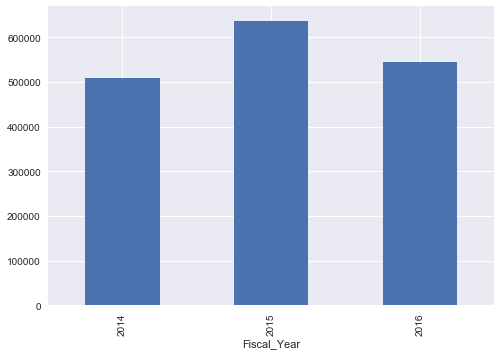

In [74]:
nyc.groupby('Fiscal_Year').size().plot(kind='bar')

## Split the dataset by year

In [75]:
nyc14 = nyc[nyc['Fiscal_Year'] == 2014]
nyc15 = nyc[nyc['Fiscal_Year'] == 2015]
nyc16 = nyc[nyc['Fiscal_Year'] == 2016]

In [127]:
Name = nyc.Last_Name + "-"+ nyc.First_Name + "-" + nyc.Mid_Init
Name.duplicated()

0          False
1          False
2          False
3          False
4          False
5           True
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13          True
14         False
15         False
16          True
17          True
18         False
19         False
20         False
21          True
22         False
23         False
24          True
25          True
26         False
27         False
28          True
29          True
           ...  
1691457     True
1691458     True
1691459     True
1691460     True
1691461     True
1691462     True
1691463     True
1691464     True
1691465     True
1691466     True
1691467     True
1691468     True
1691469     True
1691470     True
1691471     True
1691472     True
1691473     True
1691474     True
1691475     True
1691476     True
1691477     True
1691478     True
1691479     True
1691480     True
1691481     True
1691482     True
1691483     True
1691484     Tr

## Comapring Departments and Job Titles

In [136]:
#nyc_top_agency = 
a = nyc.groupby(['Fiscal_Year', 'Agency_Name'])['TotalPay']

#nyc_top_agency = nyc_top_agency + nyc14.groupby(['Agency_Name', 'Fiscal_Year']).size().sort_values().tail(20)
#nyc_top_agency = nyc_top_agency + nyc16.groupby(['Agency_Name', 'Fiscal_Year']).size().sort_values().tail(20)
#nyc_top_agency.unstack('Fiscal_Year')

In [ ]:
# data.groupby(['col1', 'col2'])['col3'].mean()

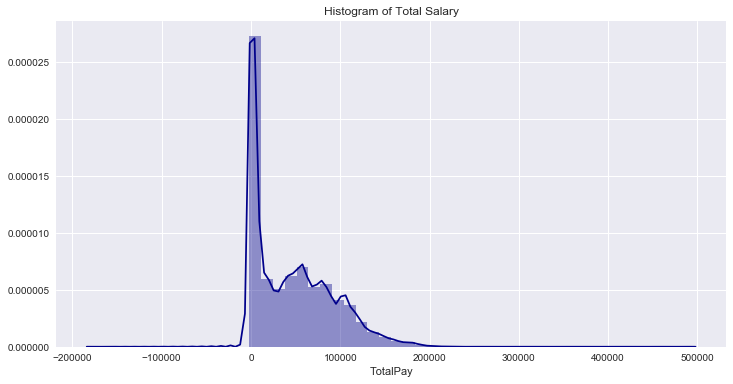

In [78]:
plt.figure(figsize = (12,6))
plt.title("Histogram of Total Salary")
sns.distplot(nyc15.TotalPay, color = 'darkblue')

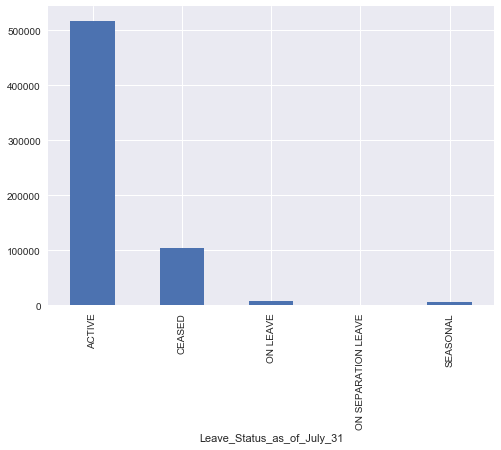

In [79]:
nyc15.groupby('Leave_Status_as_of_July_31').size().plot(kind='bar')

http://matplotlib.org/gallery.html

How many employees per 'Agency Name'?

In [81]:
nyc.groupby('Agency_Name').size().sort_values()

Agency_Name
DISTRICTING COMMISSION                 3
BRONX COMMUNITY BOARD #3               6
BRONX COMMUNITY BOARD #6               7
BRONX COMMUNITY BOARD #1               7
BROOKLYN COMMUNITY BOARD #9            8
MANHATTAN COMMUNITY BOARD #9           9
QUEENS COMMUNITY BOARD #14             9
BROOKLYN COMMUNITY BOARD #3            9
BROOKLYN COMMUNITY BOARD #14           9
BROOKLYN COMMUNITY BOARD #10           9
BRONX COMMUNITY BOARD #9               9
BRONX COMMUNITY BOARD #8               9
BRONX COMMUNITY BOARD #5               9
BRONX COMMUNITY BOARD #2               9
BROOKLYN COMMUNITY BOARD #11           9
STATEN ISLAND COMMUNITY BD #3          9
MANHATTAN COMMUNITY BOARD #7           9
BROOKLYN COMMUNITY BOARD #6           10
BROOKLYN COMMUNITY BOARD #16          10
BROOKLYN COMMUNITY BOARD #7           10
QUEENS COMMUNITY BOARD #13            10
BROOKLYN COMMUNITY BOARD #12          10
BROOKLYN COMMUNITY BOARD #2           10
BROOKLYN COMMUNITY BOARD #18          10
QUEE

Are there any duplicate names in the dataset?

In [ ]:
nyc.

What is the averge length of employement?

In [ ]:
nyc.Agency_Start_Date.mean()

 Which employee has been employed the longest?

In [ ]:
nyc.Agen

What is the correlation between titles and salaries?

In [140]:
nyc.groupby(['Title_Description']).size()

Title_Description
                                                                   6
* ATTENDING DENTIST                                                2
*ADM DIR FLEET MAINT-MGRL ASGMNT                                   2
*ADM DIR FLEET MAINTENANCE - NM                                    3
*ADM SCHOOL SECURITY MANAGER-U                                     8
*ADMIN SCHL SECUR MGR-MGL                                          1
*ADMIN SCHL SECUR MGR-MGL                                          2
*ADMINISTRATIVE ATTORNEY                                           1
*ADMINISTRATIVE ATTORNEY                                          15
*ASIST SYSTMS ANALYST                                              6
*ASSIST COORDINATING MANAGER                                      28
*ASSOCIATE DIRECTOR HEALTH PROGRAM                                11
*ASSOCIATE EXECUTIVE DIRECTOR                                     20
*ATTORNEY AT LAW                                                   5
*ATTORNEY AT LAW

What are the average hours worked?

In [144]:
nyc.Regular_Hours.mean()

702.29114129824302

What is the avergae OT time worked?

In [156]:
nyc.OT_Hours.mean()


64.438383965341714

In [155]:
nyc.OT_Hours.sum()

108996624.34

What is the total OT paid?

In [151]:
nyc.Total_OT_Paid.sum()

5820003367.4000006

#### What is the avarage hourly OT rate?

We can later use this as a metrics against other city datasets.

In [159]:
# Average hourly rate for OT.
nyc.Total_OT_Paid.sum() / nyc.OT_Hours.sum()

53.396179951824003

How have salaries changed between the years?

How have hours worked changed between the years?

In [161]:
nyc.columns

Index(['Fiscal_Year', 'Agency_Name', 'Last_Name', 'First_Name', 'Mid_Init',
       'Agency_Start_Date', 'Title_Description', 'Leave_Status_as_of_July_31',
       'Pay_Basis', 'Regular_Hours', 'Regular_Gross_Paid', 'OT_Hours',
       'Total_OT_Paid', 'Total_Other_Pay', 'TotalPay'],
      dtype='object')

In [173]:
nyc.groupby(nyc.Fiscal_Year).Regular_Hours.agg(sum)

Fiscal_Year
2014    5.560554e+06
2015    7.242389e+06
2016    5.758238e+06
Name: Regular_Hours, dtype: float64

In [189]:
nyc_x = nyc.groupby(['Fiscal_Year' , 'Regular_Hours']) #.Regular_Hours.sum(axis=1)
nyc_x.sum()

TypeError: f() got an unexpected keyword argument 'axis'

In [192]:
for y in range(2014, 2017):
    print(y, (nyc.Fiscal_Year == y).sum())

2014 509525
2015 637144
2016 544818


In [201]:
#pd.DataFrame(

for y in range(2014, 2017):
    x = (y, (nyc.Fiscal_Year == y), nyc.Total_OT_Paid.sum())

    
    print(x)

(2014, 0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
1691457    False
1691458    False
1691459    False
1691460    False
1691461    False
1691462    False
1691463    False
1691464    False
1691465    False
1691466    False
1691467    False
1691468    False
1691469    False
1691470    False
1691471    False
1691472    False
1691473    False
1691474    False
1691475    False
1691476    False
1691477    False
1691478    False
1691479    False
1691480    False
1691481    False
1691482    False
1691483    False
1691484

Can we split the dataset between males and females?

In [ ]:
# Try to use https://www.gender-api.com

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

In [ ]:
# How have salaries changed over time between different groups of people?

In [ ]:
# How are base pay, overtime pay and benefits allocated between different groups?

In [ ]:
# Is there any evidene of pay discrimination based on gender in this dataset?

In [ ]:
# How is budget allocated based on different groups and responsibilities?

### Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

### By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?